# Analisi dei dati per il sub task 2b

Copia delle immagini in cartelle per elaborarle più agilmente

In [ ]:
import os
import json
import shutil

#labels = ["non_propagandistic", "propagandistic"]

# Percorsi
#json_path = '../files/annotations_v2/semeval2024_dev_release/subtask2b/val.json'
#json_path = "../files/dev_gold_labels/test.json"
json_path = "dataset/val.json"
images_folder = "../files/subtask2b_images/val/"
output_folder = "dataset/val/"

# Crea cartelle di destinazione
prop_folder = os.path.join(output_folder, "propagandistic")
non_prop_folder = os.path.join(output_folder, "non_propagandistic")
os.makedirs(prop_folder, exist_ok=True)
os.makedirs(non_prop_folder, exist_ok=True)

# Carica il JSON
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Processa le immagini
for entry in data:
    image_name = entry["image"]
    label = entry["label"]
    image_path = os.path.join(images_folder, image_name)

    if not os.path.exists(image_path):
        print(f"[WARN] Immagine non trovata: {image_name}")
        continue

    if label.lower() == "propagandistic":
        dest_path = os.path.join(prop_folder, image_name)
    else:
        dest_path = os.path.join(non_prop_folder, image_name)

    shutil.copy(image_path, dest_path)

print("✔️ Immagini copiate nelle rispettive cartelle.")


✔️ Immagini copiate nelle rispettive cartelle.


Analisi del numero di elementi per classe (vedere come il dataset è bilanciato)

Classi trovate: ['non_propagandistic', 'propagandistic']

Numero di immagini per classe:
non_propagandistic: 450
propagandistic: 900

Altezza media: 811.16, larghezza media: 814.15


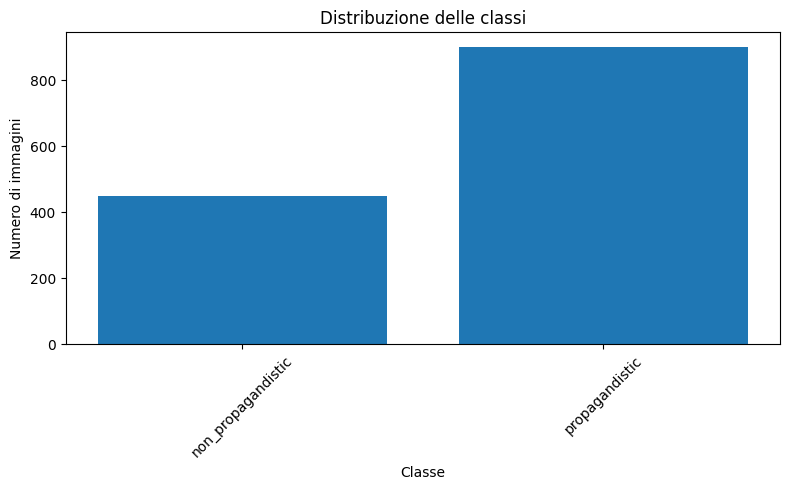

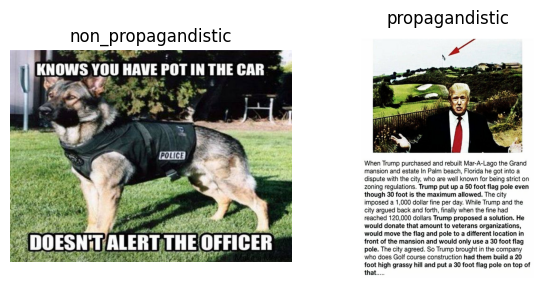

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Path al dataset
dataset_path = "dataset_train_e_val_assieme/train/"

# Statistiche
class_counts = defaultdict(int)
image_shapes = []

# Estrai classi
classes = sorted(os.listdir(dataset_path))
print(f"Classi trovate: {classes}")

# Analisi
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_path):
        continue

    for fname in os.listdir(class_path):
        if fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            fpath = os.path.join(class_path, fname)
            img = cv2.imread(fpath)
            if img is not None:
                class_counts[cls] += 1
                image_shapes.append(img.shape)

# Mostra conteggi per classe
print("\nNumero di immagini per classe:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Statistiche dimensionali
heights, widths = zip(*[(s[0], s[1]) for s in image_shapes])
print(f"\nAltezza media: {np.mean(heights):.2f}, larghezza media: {np.mean(widths):.2f}")

# Istogramma delle classi
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Distribuzione delle classi")
plt.xlabel("Classe")
plt.ylabel("Numero di immagini")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizza immagini campione
n_samples = 5
plt.figure(figsize=(15, 3))
sampled = 0

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp"))]
    if images:
        img_path = os.path.join(class_path, images[0])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n_samples, sampled + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")
        sampled += 1
        if sampled >= n_samples:
            break

plt.tight_layout()
plt.show()


## Analisi della distribuzione della lunghezza dei testi

(Solo la lunghezza grezza del testo)

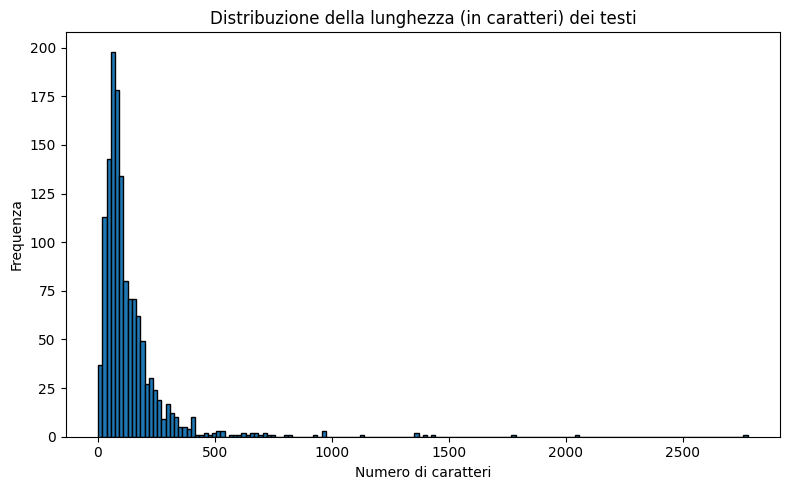

In [1]:
# ------------------------------------------------------------
# Analisi distribuzione lunghezza grezza dei testi ed in aggiunta un esempio
# ------------------------------------------------------------

import json
from pathlib import Path
import matplotlib.pyplot as plt

# Caricamento del file
DATA_DIR  = "../pre_processing/dataset_train_e_val_assieme/train/"   # root dir for all images (train/val)
TEST_DIR  = "../pre_processing/dataset_train_e_val_assieme/test/"    # root dir for test images
TRAIN_JSON = "../pre_processing/dataset_train_e_val_assieme/train.json"
TEST_JSON  = "../pre_processing/dataset_train_e_val_assieme/test.json"

json_path = Path(TRAIN_JSON)

# Funzione per contare le parole
def word_count(text: str) -> int:
    return len(text) 


# Lettura e processing
with json_path.open(encoding="utf-8") as f:
    data = json.load(f)

lengths = [word_count(item["text"]) for item in data if "text" in item]

# Plot dell’istogramma 
plt.figure(figsize=(8, 5))
plt.hist(lengths, bins="auto", edgecolor="black")
plt.title("Distribuzione della lunghezza (in caratteri) dei testi")
plt.xlabel("Numero di caratteri")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()


(Testo pre-processato)

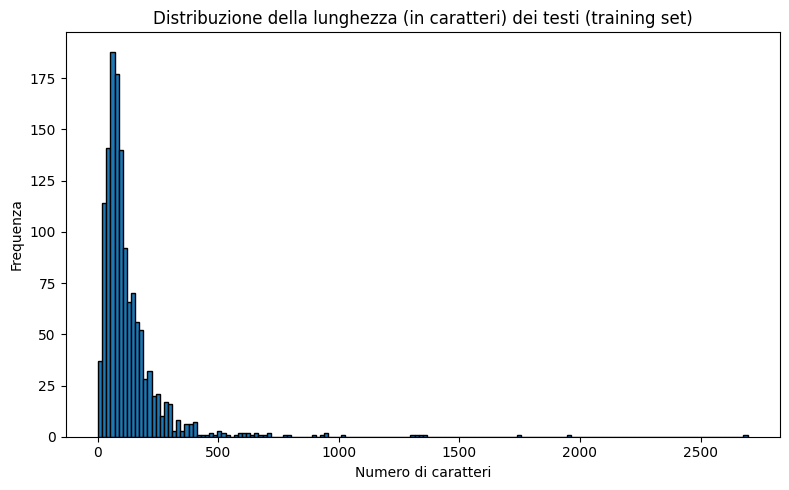

In [11]:
# ------------------------------------------------------------
# Analisi distribuzione lunghezza ripulita dei testi ed in aggiunta un esempio
# ------------------------------------------------------------

import json
from pathlib import Path
import matplotlib.pyplot as plt
import re

# Caricamento del file
DATA_DIR  = "../pre_processing/dataset_train_e_val_assieme/train/"   # root dir for all images (train/val)
TEST_DIR  = "../pre_processing/dataset_train_e_val_assieme/test/"    # root dir for test images
TRAIN_JSON = "../pre_processing/dataset_train_e_val_assieme/train.json"
TEST_JSON  = "../pre_processing/dataset_train_e_val_assieme/test.json"

json_path = Path(TRAIN_JSON)

# Funzione per contare le parole
def word_count(text: str) -> int:
    text = text.lower()
    text = re.sub(r"\\n", " ", text).strip() 
    text = re.sub(r"\n", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"  ", " ", text).strip() 
    return len(text) 


# Lettura e processing
with json_path.open(encoding="utf-8") as f:
    data = json.load(f)

lengths = [word_count(item["text"]) for item in data if "text" in item]

# Plot dell’istogramma 
plt.figure(figsize=(8, 5))
plt.hist(lengths, bins="auto", edgecolor="black")
plt.title("Distribuzione della lunghezza (in caratteri) dei testi (training set)")
plt.xlabel("Numero di caratteri")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()


Token indices sequence length is longer than the specified maximum sequence length for this model (440 > 77). Running this sequence through the model will result in indexing errors


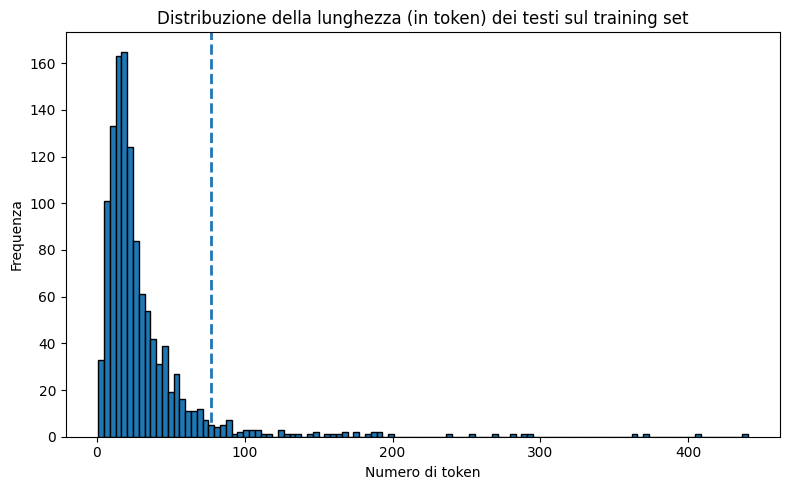

Numero di testi troncati: 63 su 1200 (5.25%)
Numero di testi vuoti: 0 su 1200 (0.00%)


In [8]:
# ------------------------------------------------------------
# Analisi distribuzione lunghezza dei testi ripuliti tokenizzati col modello clip
# ------------------------------------------------------------

from transformers import AutoTokenizer

# Carica il tokenizer pre-addestrato di CLIP ViT-B/32
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14")


import json
import re
from pathlib import Path

import matplotlib.pyplot as plt

# Caricamento del file
DATA_DIR  = "../pre_processing/dataset_train_e_val_assieme/train/"   # root dir for all images (train/val)
TEST_DIR  = "../pre_processing/dataset_train_e_val_assieme/test/"    # root dir for test images
TRAIN_JSON = "../pre_processing/dataset/train.json"
VAL_JSON = "../pre_processing/dataset/val.json"
TEST_JSON  = "../pre_processing/dataset/test.json"

json_path = Path(TRAIN_JSON) 


# Funzione per contare le parole
def word_count(text: str) -> int:
    # Tokenizza il testo e ottiene gli ID dei token, includendo BOS e EOS
    
    text = text.lower()
    text = re.sub(r"\\n", " ", text).strip() 
    text = re.sub(r"\n", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"  ", " ", text).strip() 
    
    token_ids = tokenizer.encode(text, add_special_tokens=False)
    
    return len(token_ids)


# Lettura e processing
with json_path.open(encoding="utf-8") as f:
    data = json.load(f)

lengths = [word_count(item["text"]) for item in data if "text" in item]

# Plot dell’istogramma
plt.figure(figsize=(8, 5))
plt.hist(lengths, bins="auto", edgecolor="black")
plt.axvline(x=77, linestyle="--", linewidth=2, label="x = 77") 
plt.title("Distribuzione della lunghezza (in token) dei testi sul training set")
plt.xlabel("Numero di token")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()


len_over = sum(1 for n in lengths if n > 77)
len_null = sum(1 for n in lengths if n < 1)

print(f"Numero di testi troncati: {len_over} su {len(lengths)} ({len_over/len(lengths)*100:.2f}%)")
print(f"Numero di testi vuoti: {len_null} su {len(lengths)} ({len_null/len(lengths)*100:.2f}%)")



In [ ]:
# Costruzione della regex per filtrare i risultati ed analisi dei risultati
# import re
# text = [item["text"] for item in data if "text" in item]
# text = [item.lower() for item in text]
# text = [re.sub(r"\\n", " ", item).strip() for item in text]
# text = [re.sub(r"\n", " ", item).strip() for item in text]
# text = [re.sub(r"\\", " ", item).strip() for item in text]
# text = [re.sub(r"  ", " ", item).strip() for item in text]
# #text = [re.sub(r"[^A-Za-z0-9\.\,\;\:\'\"!\?\(\)\-]+", " ", item.lower()) for item in text] #es.1059 (potrei oscurare elementi importanti)
# 
# for i in range(len(text)-1):
#     print(f"{i} - {text[i]}")

0 - putin scrolling his insta for g20 news be like: g20 indonesia 1011
1 - president trump has proven that a business man can run this country better than a politician ever could! ig@patriotic.deplorables
2 - the not a prayingman, butfire would be on my hands and knees tranking the almighty that doing the worst crisis in europe since 1945, the united states is led by joe biden, not donald trump શતાવ એ
3 - what if.. we were honest with our k governments and weathe for perth tan kel. will you sety, we're blancaf p that control the of the act propaganda of the a adue 200
4 - bana wwww cuba, 2016 venezuela, 2019 fantasy land i prefer real socialism i said real socialism perfection
5 - *** senate republicans @nrsc .@edmarkey, this you? #weneednine expand the court
6 - fjames webb telescope my goodness, the universe is massive beyond our wildest imagination. wisconsin state tribintage but it still revolves around me!
7 - it's evident that some people chiming in on the lockdown debate don't h

Token indices sequence length is longer than the specified maximum sequence length for this model (164 > 77). Running this sequence through the model will result in indexing errors


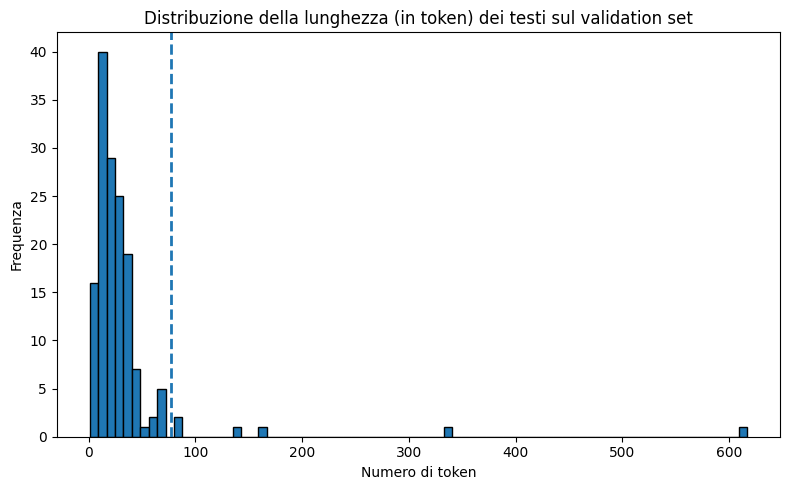

Numero di testi troncati: 6 su 150 (4.00%)
Numero di testi vuoti: 0 su 150 (0.00%)


In [9]:
# ------------------------------------------------------------
# Analisi distribuzione lunghezza dei testi ripuliti tokenizzati col modello clip
# ------------------------------------------------------------

from transformers import AutoTokenizer

# Carica il tokenizer pre-addestrato di CLIP ViT-B/32
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14")


import json
import re
from pathlib import Path

import matplotlib.pyplot as plt

# Caricamento del file
DATA_DIR  = "../pre_processing/dataset_train_e_val_assieme/train/"   # root dir for all images (train/val)
TEST_DIR  = "../pre_processing/dataset_train_e_val_assieme/test/"    # root dir for test images
TRAIN_JSON = "../pre_processing/dataset/train.json"
VAL_JSON = "../pre_processing/dataset/val.json"
TEST_JSON  = "../pre_processing/dataset/test.json"

json_path = Path(VAL_JSON) 


# Funzione per contare le parole
def word_count(text: str) -> int:
    # Tokenizza il testo e ottiene gli ID dei token, includendo BOS e EOS
    
    text = text.lower()
    text = re.sub(r"\\n", " ", text).strip() 
    text = re.sub(r"\n", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"  ", " ", text).strip() 
    
    token_ids = tokenizer.encode(text, add_special_tokens=False)
    
    return len(token_ids)


# Lettura e processing
with json_path.open(encoding="utf-8") as f:
    data = json.load(f)

lengths = [word_count(item["text"]) for item in data if "text" in item]

# Plot dell’istogramma
plt.figure(figsize=(8, 5))
plt.hist(lengths, bins="auto", edgecolor="black")
plt.axvline(x=77, linestyle="--", linewidth=2, label="x = 77") 
plt.title("Distribuzione della lunghezza (in token) dei testi sul validation set")
plt.xlabel("Numero di token")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()


len_over = sum(1 for n in lengths if n > 77)
len_null = sum(1 for n in lengths if n < 1)

print(f"Numero di testi troncati: {len_over} su {len(lengths)} ({len_over/len(lengths)*100:.2f}%)")
print(f"Numero di testi vuoti: {len_null} su {len(lengths)} ({len_null/len(lengths)*100:.2f}%)")



Token indices sequence length is longer than the specified maximum sequence length for this model (377 > 77). Running this sequence through the model will result in indexing errors


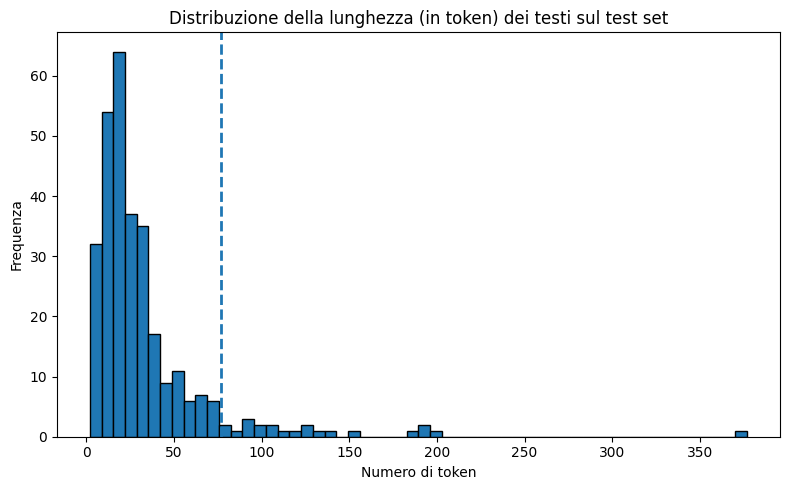

Numero di testi troncati: 21 su 300 (7.00%)
Numero di testi vuoti: 0 su 300 (0.00%)


In [10]:
# ------------------------------------------------------------
# Analisi distribuzione lunghezza dei testi ripuliti tokenizzati col modello clip
# ------------------------------------------------------------

from transformers import AutoTokenizer

# Carica il tokenizer pre-addestrato di CLIP ViT-B/32
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14")


import json
import re
from pathlib import Path

import matplotlib.pyplot as plt

# Caricamento del file
DATA_DIR  = "../pre_processing/dataset_train_e_val_assieme/train/"   # root dir for all images (train/val)
TEST_DIR  = "../pre_processing/dataset_train_e_val_assieme/test/"    # root dir for test images
TRAIN_JSON = "../pre_processing/dataset/train.json"
VAL_JSON = "../pre_processing/dataset/val.json"
TEST_JSON  = "../pre_processing/dataset/test.json"

json_path = Path(TEST_JSON) 


# Funzione per contare le parole
def word_count(text: str) -> int:
    # Tokenizza il testo e ottiene gli ID dei token, includendo BOS e EOS
    
    text = text.lower()
    text = re.sub(r"\\n", " ", text).strip() 
    text = re.sub(r"\n", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"\\", " ", text).strip() 
    text = re.sub(r"  ", " ", text).strip() 
    
    token_ids = tokenizer.encode(text, add_special_tokens=False)
    
    return len(token_ids)


# Lettura e processing
with json_path.open(encoding="utf-8") as f:
    data = json.load(f)

lengths = [word_count(item["text"]) for item in data if "text" in item]

# Plot dell’istogramma
plt.figure(figsize=(8, 5))
plt.hist(lengths, bins="auto", edgecolor="black")
plt.axvline(x=77, linestyle="--", linewidth=2, label="x = 77") 
plt.title("Distribuzione della lunghezza (in token) dei testi sul test set")
plt.xlabel("Numero di token")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()


len_over = sum(1 for n in lengths if n > 77)
len_null = sum(1 for n in lengths if n < 1)

print(f"Numero di testi troncati: {len_over} su {len(lengths)} ({len_over/len(lengths)*100:.2f}%)")
print(f"Numero di testi vuoti: {len_null} su {len(lengths)} ({len_null/len(lengths)*100:.2f}%)")



#### Extra: Visualizzazione di word cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


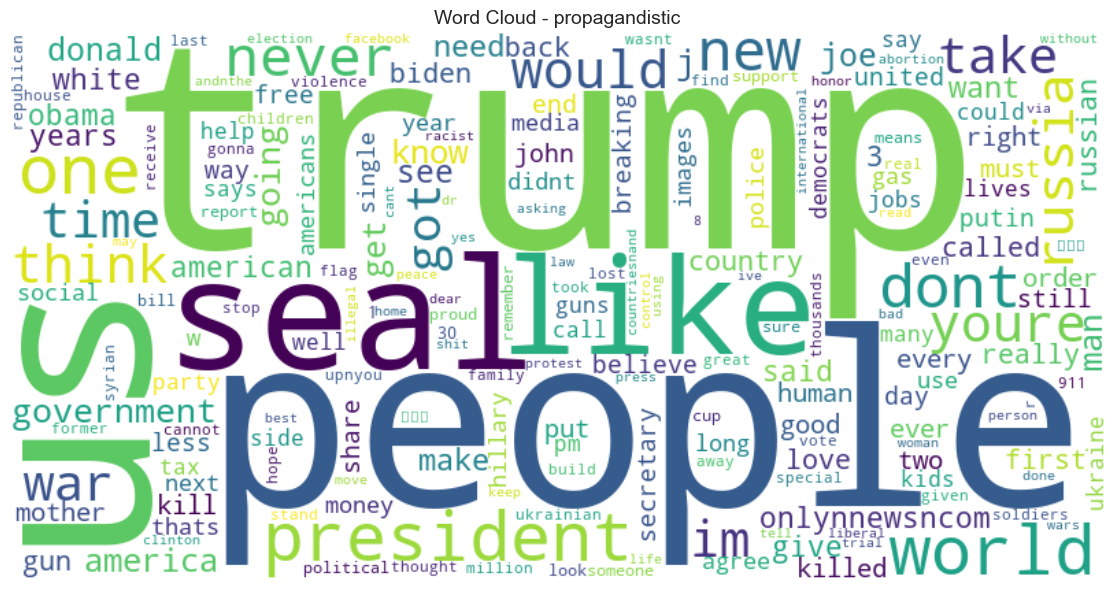


📊 Top 20 parole per la classe: 'propagandistic' (stopword escluse)
trump           57
people          38
us              36
seal            36
like            33
president       32
one             32
world           32
dont            24
new             22
never           21
russia          20
would           18
think           18
youre           18
war             17
take            17
time            17
im              17
got             16
----------------------------------------


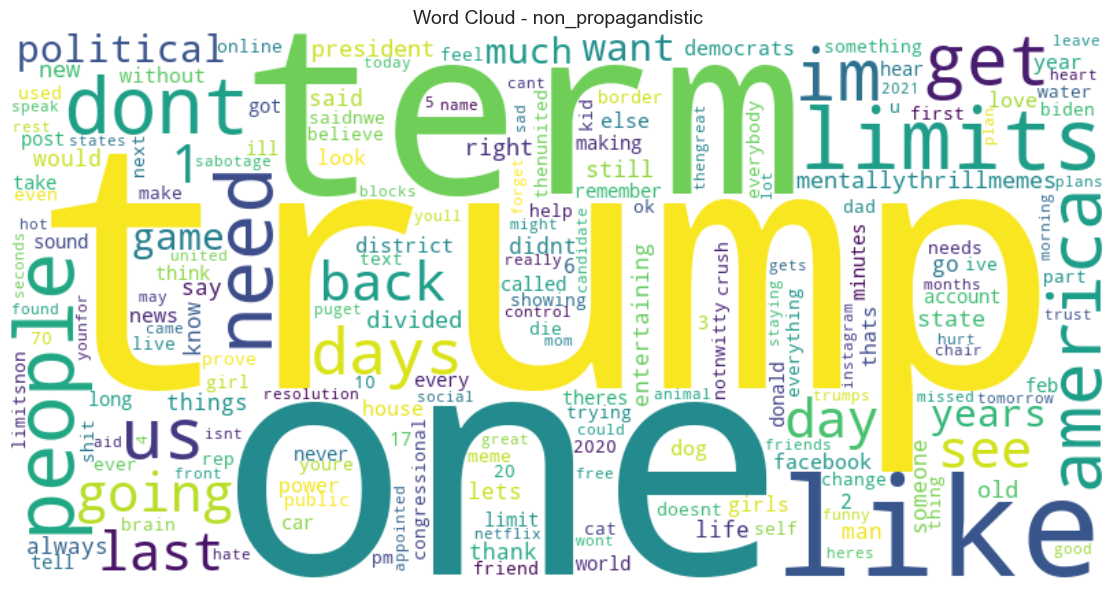


📊 Top 20 parole per la classe: 'non_propagandistic' (stopword escluse)
trump           28
one             23
term            20
like            19
limits          18
people          16
need            15
dont            15
im              13
america         13
get             12
us              12
days            10
going           10
last            10
back            10
1               10
see             10
day             10
political       9
----------------------------------------


In [ ]:
import json
import string
from collections import defaultdict, Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('italian') + stopwords.words('english'))

# CONFIG
TOP_K = 20
DATA_DIR  = "../pre_processing/dataset_train_e_val_assieme/train/"   # root dir for all images (train/val)
TEST_DIR  = "../pre_processing/dataset_train_e_val_assieme/test/"    # root dir for test images
TRAIN_JSON = "../pre_processing/dataset_train_e_val_assieme/train.json"
TEST_JSON  = "../pre_processing/dataset_train_e_val_assieme/test.json"
TRAIN_JSON_PATH = TRAIN_JSON

# Stopword personalizzate (per aggiungerne altre nello specifico)
# custom_stopwords = set(STOPWORDS)
# custom_stopwords.update([
#     "the", "a", "an", "of", "to", "in", "on", "and", "or", "is", "are",
#     "that", "for", "with", "at", "this", "as", "it", "was", "by", "from",
#     "be", "will", "we", "you", "i", "they", "he", "she", "but", "not", "so"
# ])

def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    return " ".join([word for word in text.split() if word not in stop_words])

# Caricamento dati
with open(TRAIN_JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

# Raggruppamento testi per label
texts_by_label = defaultdict(list)
for entry in data:
    label = entry["label"]
    text = preprocess_text(entry["text"])
    texts_by_label[label].append(text)

# Creazione wordcloud ed analisi della frequenza
for label, texts in texts_by_label.items():
    all_text = " ".join(texts)
    tokens = all_text.split()

    # Conteggio frequenze
    word_counts = Counter(tokens)
    most_common = word_counts.most_common(TOP_K)

    # WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stop_words #custom_stopwords
    ).generate_from_frequencies(word_counts)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"wordcloud_{label}.png")  # Salva su file
    plt.show()

    # Tabella frequenze
    print(f"\n📊 Top {TOP_K} parole per la classe: '{label}' (stopword escluse)")
    for word, count in most_common:
        print(f"{word:<15} {count}")
    print("-" * 40)
